<a href="https://colab.research.google.com/github/Smita569/E-commerce_Marketing_and_sales/blob/main/E_commerce_Marketing_and_sales_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement 📈

The e-commerce company aims to leverage **data-driven insights** 🧠 to enhance:

*   Customer Acquisition 🤝
*   Customer Retention ✅
*   Revenue Optimization 💰

The following analysis will be conducted to:

*   Understand key business trends 📊
*   Improve decision-making 🤔

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#!git clone https://github.com/Smita569/E-commerce_Marketing_and_sales.git

Cloning into 'E-commerce_Marketing_and_sales'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 45 (delta 20), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (45/45), 677.66 KiB | 3.21 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [ ]:
# Upload csv files into dataframe

df_customerData = pd.read_csv('E-commerce_Marketing_and_sales/CustomersData.csv')
df_discountCoupon = pd.read_csv('E-commerce_Marketing_and_sales/Discount_Coupon.csv')
df_marketingSpend = pd.read_csv('E-commerce_Marketing_and_sales/Marketing_Spend.csv')
df_onlineSales = pd.read_csv('E-commerce_Marketing_and_sales/Online_Sales.csv')
df_taxAmount=pd.read_csv('E-commerce_Marketing_and_sales/Tax_amount.csv')


In [ ]:
# Read customer data
df_customerData.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [ ]:
# Read discount coupon data
df_discountCoupon.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [ ]:
# Read marketing spend data
df_marketingSpend.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [ ]:
# Read online sales data
df_onlineSales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [ ]:
# Read tax amount data
df_taxAmount.head()

,Product_Category,GST
0,Nest-USA,10%
1,Office,10%
2,Apparel,18%
3,Bags,18%
4,Drinkware,18%


## 💡 Business questions:

#  Question 1 🤔📊📈📉

1.  **Identify the months with the highest and lowest acquisition rates.** 📈📉 What strategies could be implemented to address the fluctuations and ensure consistent growth throughout the year? 🤔✅

In [ ]:
# Convert 'Transaction_Date' column to datetime objects and extract the year and month
df_onlineSales['Year_Month']=pd.to_datetime(df_onlineSales['Transaction_Date']).dt.to_period('M')

# Sort the DataFrame by 'Year_Month' and keep the first occurrence for each 'CustomerID'
# This identifies the first month each customer made a purchase, indicating their acquisition month.

first_purchase_month = df_onlineSales[['CustomerID','Year_Month']].sort_values(by='Year_Month').drop_duplicates(subset='CustomerID',keep='first')

# Count the number of new customers acquired in each month
monthly_acquisition = first_purchase_month.groupby('Year_Month').count().reset_index()

# Rename the columns for clarity: the first column is the 'Year_Month' and the second is the count of 'New_Customers'.
monthly_acquisition.columns = ['Year_Month', 'New_Customers']
print(f'Month with the highest acquisition rate: {monthly_acquisition.loc[monthly_acquisition["New_Customers"].idxmax()]["Year_Month"]}')
print(f'Month with the lowest acquisition rate: {monthly_acquisition.loc[monthly_acquisition["New_Customers"].idxmin()]["Year_Month"]}')

Month with the highest acquisition rate: 2019-01
Month with the lowest acquisition rate: 2019-11


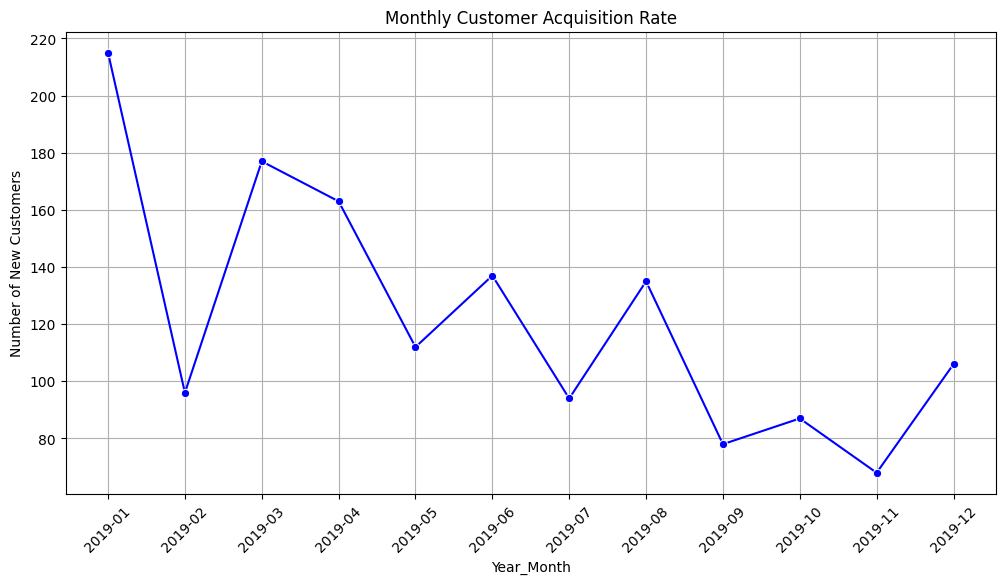

In [ ]:
# plot the line plot graph for the above data
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_acquisition,x=monthly_acquisition['Year_Month'].astype(str), y=monthly_acquisition['New_Customers'],marker='o',color='blue')
plt.title('Monthly Customer Acquisition Rate')
plt.xlabel('Year_Month')
plt.ylabel('Number of New Customers')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

**Here are some strategic considerations to address fluctuations and foster consistent growth:**

**Optimize Marketing ROI** 💰: Our analysis reveals a potential disconnect between marketing spend and new customer acquisition. To maximize profitability, we must rigorously evaluate the effectiveness of our current online and offline marketing channels. By refining our targeting strategies, exploring innovative campaign approaches, and potentially diversifying our marketing mix, we can enhance customer attraction and ensure a higher return on investment for our marketing efforts.

**Unlock Untapped Market Potential:**🗺️: Data highlights lower acquisition and sales performance in Washington D.C,New York and New Jersey. This represents a significant opportunity for growth. By developing targeted marketing strategies and localized initiatives in these key regions, we can increase brand visibility, attract new customers, and expand our market penetration, driving overall revenue growth.


# Question 2 🤔📊📈📉

2.   **Analyze the data** 📊 to determine if **certain months consistently** show higher 📈 or lower acquisition rates 📉. How can the company capitalize on high-performing months 💪 and improve performance during slower periods? 🤔

*  Based on the provided line plot of monthly customer acquisition rates, a discernible pattern emerges. January consistently exhibits higher acquisition rates 📈 compared to February, which shows a subsequent decrease 📉. Generally, we observe an alternating trend of increasing and decreasing acquisition rates month-over-month. An exception to this pattern is noted in the March-April period, where there is a continuous decline in acquisition rates 📉.

In [ ]:
# Extract the month from the 'Date' column and create a new 'Month' column.
df_marketingSpend['Month']=pd.to_datetime(df_marketingSpend['Date']).dt.month
# Group the DataFrame by the extracted 'Month' and calculate the sum of 'Online_Spend' and 'Offline_Spend' for each month.
monthly_marketing_spend=df_marketingSpend.groupby('Month')[['Online_Spend','Offline_Spend']].sum().reset_index()
monthly_marketing_spend

In [ ]:
# plot the line plot graph for the above data
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.lineplot(ax=axes[0], data=monthly_acquisition, x=monthly_acquisition['Year_Month'].astype(str), y=monthly_acquisition['New_Customers'], marker='o', color='blue')
axes[0].set_title('Monthly Customer Acquisition Rate')
axes[0].set_xlabel('Year_Month')
axes[0].set_ylabel('Number of New Customers')
axes[0].grid(True)
axes[0].tick_params(axis='x', rotation=45)

# Plot Monthly Marketing Spend (Online vs. Offline)
sns.lineplot(ax=axes[1], data=monthly_marketing_spend, x='Month', y='Online_Spend', label='Online Spend', marker='o')
sns.lineplot(ax=axes[1], data=monthly_marketing_spend, x='Month', y='Offline_Spend', label='Offline Spend', marker='o')
axes[1].set_title('Monthly Marketing Spend (Online vs. Offline)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Spend')
axes[1].set_xticks(monthly_marketing_spend['Month']) # Ensure all months are shown on x-axis
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

* **Capitalizing on Momentum**: High-Performing Months 💪 During months exhibiting high customer acquisition rates, we should strategically increase our investment in online marketing channels. This allows us to capitalize on existing market momentum, amplifying our reach and attracting an even larger customer base. 📈💰

* Innovation and Optimization 💡 In these periods of strong performance, we have an opportunity to experiment with new online marketing strategies and optimize existing campaigns for maximum impact. By continuously refining our approach, we can sustain high acquisition rates and maximize return on investment. ✨✅

* **Addressing Slower Periods**: Lower-Performing Months 📉 During months where customer acquisition rates are lower, we should consider increasing our overall marketing capital allocation. The observed correlation between decreased marketing spend and lower acquisition rates suggests that sustained investment is crucial for maintaining a healthy inflow of new customers. 💲📊

* Targeted Strategies 🎯 While increasing investment, it's essential to develop targeted strategies to understand and address the specific reasons for lower performance in these months. This might involve analyzing consumer behavior, market conditions, or the competitive landscape during these periods. 🤔🔬

* Evaluating the Exception: February-March-April Anomaly 🤔🗓️ The pattern observed in February, March, and April, where acquisition rates decline despite marketing spend fluctuations, warrants further investigation. We need to analyze the specific factors influencing customer behavior during these months to develop tailored interventions. 🕵️‍♀️🚧

# Question 3 🤔📊📈📉

3. Identify periods with the **strongest and weakest retention rates**💪📉. What strategies could be **implemented to improve retention** during weaker months?

In [172]:
df_onlineSales['Year_Month']=pd.to_datetime(df_onlineSales['Transaction_Date']).dt.to_period('M')
customer_per_month=df_onlineSales.groupby('Year_Month')['CustomerID'].nunique().reset_index()
customer_per_month.columns = ['Year_Month', 'Total_Customers']
customer_per_month

,Year_Month,Total_Customers
0,2019-01,215
1,2019-02,109
2,2019-03,208
3,2019-04,224
4,2019-05,200
5,2019-06,259
6,2019-07,236
7,2019-08,300
8,2019-09,193
9,2019-10,210


In [173]:
customer_previous_month=customer_per_month
customer_previous_month['Total_Customers']=customer_previous_month['Total_Customers'].shift(1)
customer_previous_month.dropna(inplace=True)
customer_previous_month['Total_Customers']=customer_previous_month['Total_Customers'].astype(int)
customer_previous_month

,Year_Month,Total_Customers
1,2019-02,215
2,2019-03,109
3,2019-04,208
4,2019-05,224
5,2019-06,200
6,2019-07,259
7,2019-08,236
8,2019-09,300
9,2019-10,193
10,2019-11,210


In [174]:
df_merged=pd.merge(customer_per_month,customer_previous_month,on='Year_Month')
df_merged

,Year_Month,Total_Customers_x,Total_Customers_y
0,2019-02,215,215
1,2019-03,109,109
2,2019-04,208,208
3,2019-05,224,224
4,2019-06,200,200
5,2019-07,259,259
6,2019-08,236,236
7,2019-09,300,300
8,2019-10,193,193
9,2019-11,210,210


In [175]:
monthly_acquisition[['Year_Month','New_Customers']]

,Year_Month,New_Customers
0,2019-01,215
1,2019-02,96
2,2019-03,177
3,2019-04,163
4,2019-05,112
5,2019-06,137
6,2019-07,94
7,2019-08,135
8,2019-09,78
9,2019-10,87


In [176]:
df_merged2=pd.merge(df_merged,monthly_acquisition[['Year_Month','New_Customers']],on='Year_Month',how='left')
df_merged2

,Year_Month,Total_Customers_x,Total_Customers_y,New_Customers
0,2019-02,215,215,96
1,2019-03,109,109,177
2,2019-04,208,208,163
3,2019-05,224,224,112
4,2019-06,200,200,137
5,2019-07,259,259,94
6,2019-08,236,236,135
7,2019-09,300,300,78
8,2019-10,193,193,87
9,2019-11,210,210,68


In [177]:
df_merged2['Retention_rate']=(df_merged2['Total_Customers_x']-df_merged2['New_Customers']/df_merged2['Total_Customers_y'])
df_merged2

,Year_Month,Total_Customers_x,Total_Customers_y,New_Customers,Retention_rate
0,2019-02,215,215,96,214.553488
1,2019-03,109,109,177,107.376147
2,2019-04,208,208,163,207.216346
3,2019-05,224,224,112,223.500000
4,2019-06,200,200,137,199.315000
5,2019-07,259,259,94,258.637066
6,2019-08,236,236,135,235.427966
7,2019-09,300,300,78,299.740000
8,2019-10,193,193,87,192.549223
9,2019-11,210,210,68,209.676190


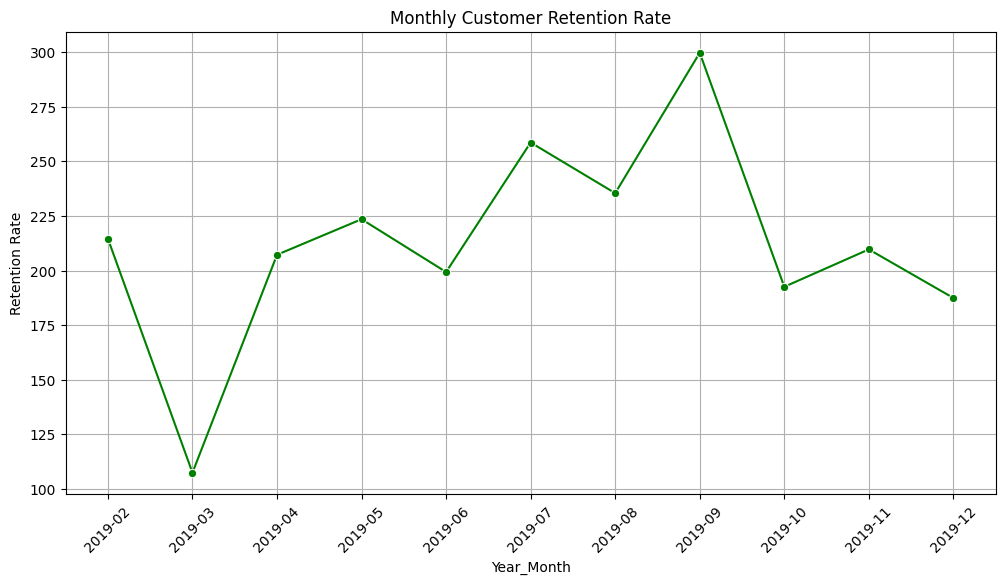

In [178]:
# prompt: plot line plot using seaborn from df_merged2 data

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_merged2, x=df_merged2['Year_Month'].astype(str), y='Retention_rate', marker='o', color='green')
plt.title('Monthly Customer Retention Rate')
plt.xlabel('Year_Month')
plt.ylabel('Retention Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()